# Import statements and Data processing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [4]:
names = ["r", "g", "b", "class"]
df = pd.read_csv("old.csv", names=names)
# df = df.iloc[::8]

df.head()

,r,g,b,class
0,142,125,109,0
1,151,134,118,0
2,166,149,133,0
3,170,153,137,0
4,164,147,131,0


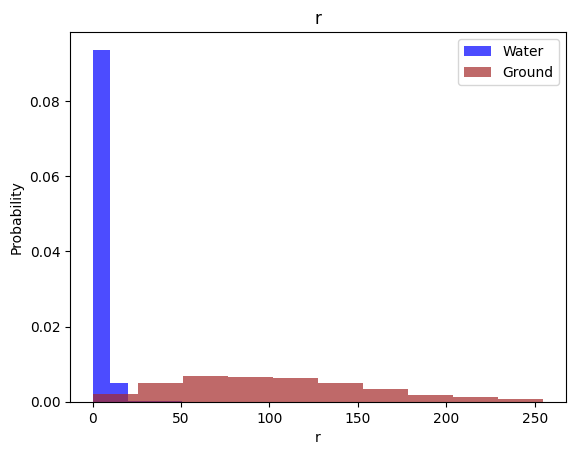

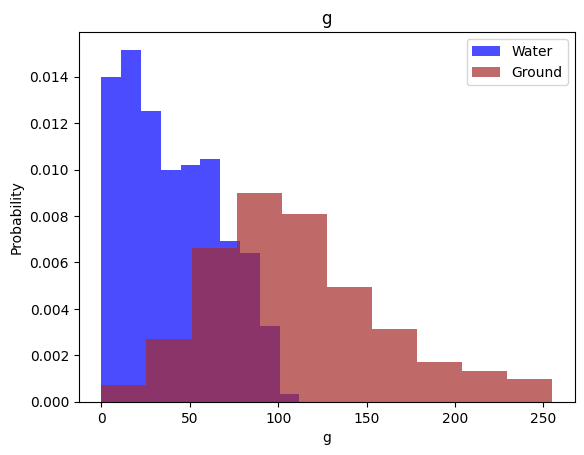

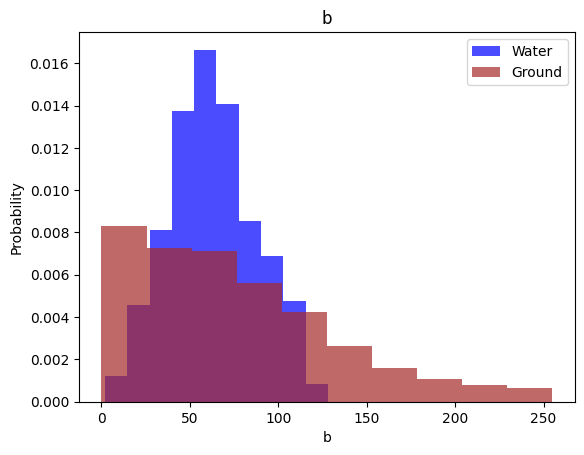

In [5]:
for label in names[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='Water', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='brown', label='Ground', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Data validation

In [6]:
from sklearn.model_selection import train_test_split
import math

In [7]:
FACTOR = 256**(1/255)

def scaleUp(value: int, flag = True):
    if round(value) > 255 and flag:
        raise ValueError("Input is greater than 255. Current input is:"+str(value))
    return math.log((value+1), FACTOR)

def scaleDown(value: int, flag = True):
    if round(value) > 255 and flag:
        raise ValueError("Input is greater than 255. Current input is:"+str(value))
    return (FACTOR**value)-1

def bias(x: list):
    for i in range(len(x)):
        item = x[i]
        item[0] = scaleUp(value = item[0])
        item[1] = scaleDown(value = item[1])
        item[2] = scaleDown(value = item[2])
        x[i] = item
    return x        

In [8]:
x = df.iloc[:, :-1].values
x = bias(x)
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# kNN Fitting

In [9]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt  

In [10]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\Jekam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    # scaler = StandardScaler()
    # X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    return data, X, y

In [12]:
train, X_train, y_train = scale_dataset(train, oversample=False)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=int(round(np.sqrt(len(X_train))))-1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=237)

In [15]:
y_pred = knn_model.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     17339
           1       0.91      0.97      0.94      1575

    accuracy                           0.99     18914
   macro avg       0.96      0.98      0.97     18914
weighted avg       0.99      0.99      0.99     18914



# Save kNN Model

In [17]:
import pickle

In [18]:
knnPickle = open(r'C:\Users\Jekam\Documents\03-Projects\Project Awareness\knnFileAlg2', 'wb') 
pickle.dump(knn_model, knnPickle)
knnPickle.close()